## 6. Histogram Equalization to Make Histogram Equlaized Foreground

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [143]:
# Import Jennifer image
jennifer = cv.imread('a1images/jeniffer.jpg')
assert jennifer is not None
jennifer_hsv = cv.cvtColor(jennifer, cv.COLOR_BGR2HSV)
jennifer_rgb = cv.cvtColor(jennifer, cv.COLOR_BGR2RGB)

# Split into planes
Hue, Saturation, Value = cv.split(jennifer_hsv)

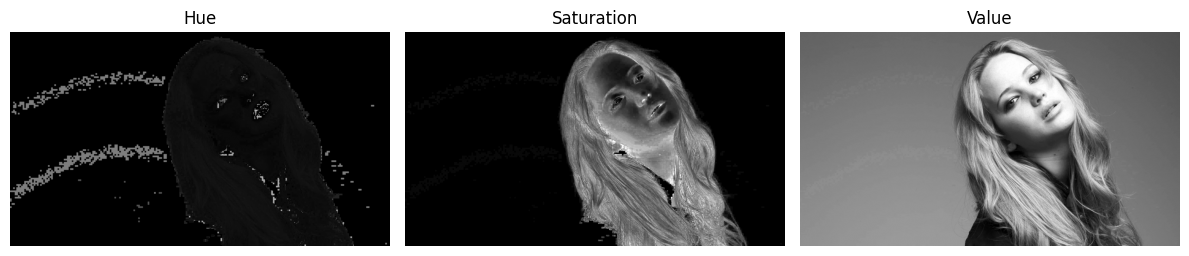

In [144]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(Hue, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(Saturation, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(Value, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

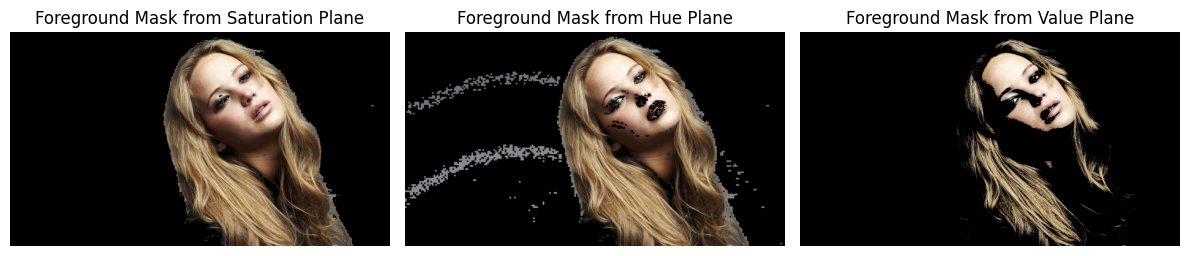

In [145]:
# Apply thresholding 
_, mask1 = cv.threshold(Saturation, 12, 255, cv.THRESH_BINARY)
_, mask2 = cv.threshold(Hue, 5, 255, cv.THRESH_BINARY)
_, mask3 = cv.threshold(Value, 160, 255, cv.THRESH_BINARY)

# Use bitwise_and to extract the foreground using the mask
foreground_mask1 = cv.bitwise_and(jennifer, jennifer, mask=mask1)
foreground_mask2 = cv.bitwise_and(jennifer, jennifer, mask=mask2)
foreground_mask3 = cv.bitwise_and(jennifer, jennifer, mask=mask3)

# Display the extracted foreground
fig, axs = plt.subplots(1, 3, figsize=(12, 8))


axs[0].imshow(cv.cvtColor(foreground_mask1, cv.COLOR_BGR2RGB))
axs[0].set_title('Foreground Mask from Saturation Plane')
axs[0].axis('off') 


axs[1].imshow(cv.cvtColor(foreground_mask2, cv.COLOR_BGR2RGB))
axs[1].set_title('Foreground Mask from Hue Plane')
axs[1].axis('off')  

axs[2].imshow(cv.cvtColor(foreground_mask3, cv.COLOR_BGR2RGB))
axs[2].set_title('Foreground Mask from Value Plane')
axs[2].axis('off') 

plt.tight_layout()
plt.show()

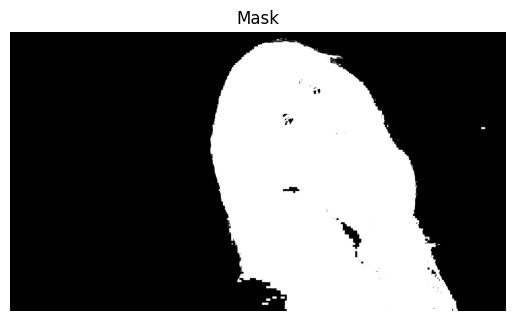

In [146]:
plt.imshow(mask1, cmap='gray')
plt.title('Mask')
plt.axis('off')
plt.show()

### Using value channel

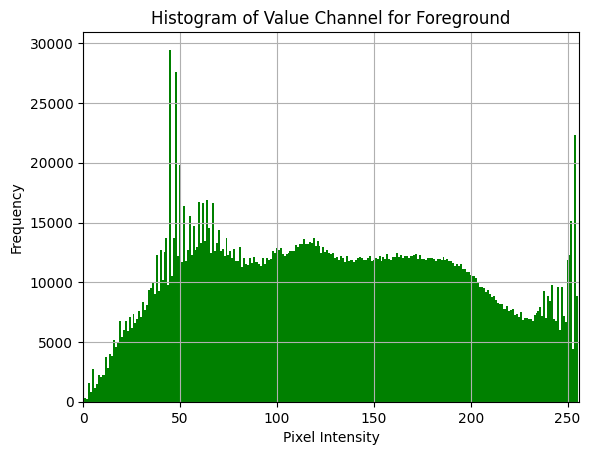

In [162]:
# Compute and plot the histogram of the Value (V) channel of the foreground
foreground_hsv = cv.cvtColor(foreground_mask1, cv.COLOR_BGR2HSV)
Hue_fg, Saturation_fg, Value_fg = cv.split(foreground_hsv)

# Calculate the histogram of the Value channel
hist = cv.calcHist([Value_fg], [0], mask1, [256], [0, 256])

# Create an array for the x positions of the bars
x_positions = np.arange(len(hist))

cumulative_hist = np.cumsum(hist)

# Plot the histogram as a bar plot
plt.figure()
plt.bar(x_positions, hist.flatten(), color='green', width=1)  # Use width=1 for each bar
plt.title('Histogram of Value Channel for Foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.grid(True)
plt.show()

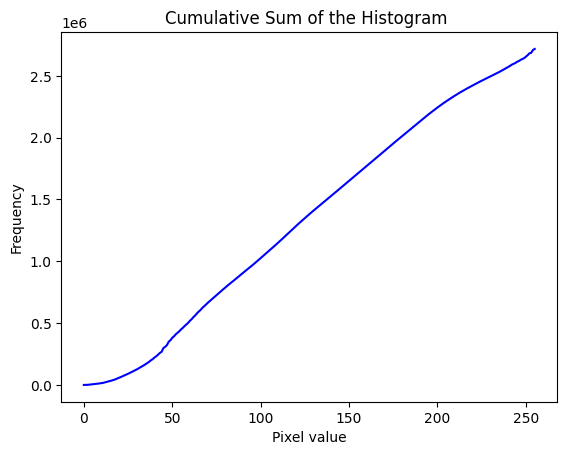

In [ ]:
# Plot the cdf
plt.figure()
plt.plot(cumulative_hist, color='blue')
plt.title('Cumulative Sum of the Histogram ')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.show()

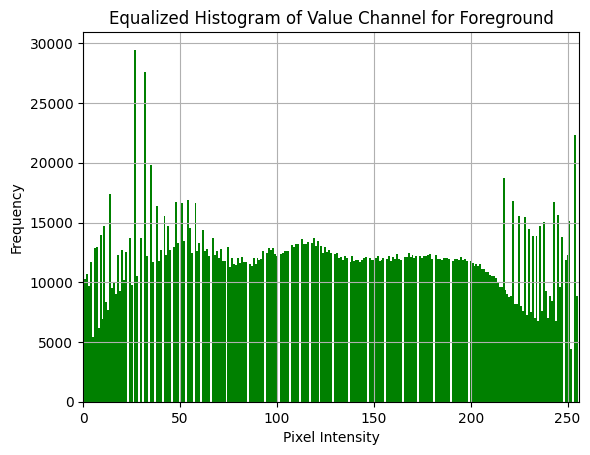

In [ ]:
# Number of pixels
pixels = cumulative_hist[-1]

# Define transformation
t = np.array([(256-1)/(pixels)*cumulative_hist[k] for k in range(256)]).astype("uint8")

# Equalize
V_eq = t[Value_fg]

# Calculate the histogram of the equalized Value channel
hist = cv.calcHist([V_eq], [0], mask1, [256], [0, 256])

# Create an array for the x positions of the bars
x_positions = np.arange(len(hist))

# Plot the histogram as a bar plot
plt.figure()
plt.bar(x_positions, hist.flatten(), color='green', width=1)  # Use width=1 for each bar
plt.title('Equalized Histogram of Value Channel for Foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])  # Set x-axis limits
plt.grid(True)
plt.show()

In [150]:
# Merge
merged = cv.merge([Hue_fg, Saturation_fg, V_eq])
foreground_modified = cv.cvtColor(merged, cv.COLOR_HSV2RGB)

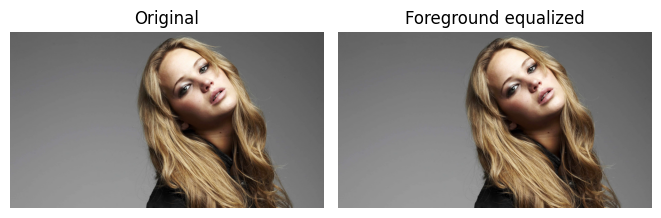

In [161]:
# Extract the background
background = cv.bitwise_and(jennifer, jennifer, mask=cv.bitwise_not(mask1))

# Merge the equalized foreground and background
result = cv.add(cv.cvtColor(background, cv.COLOR_BGR2RGB), foreground_modified)

# Display the eq_foreground
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
plt.imshow(jennifer_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(result)
plt.title('Foreground equalized')
plt.axis('off')
plt.tight_layout()
plt.show()


# Approach

The image was converted to HSV, and the saturation channel was thresholded to create a binary mask for foreground extraction. The histogram and CDF of the foreground’s value channel were then computed, and histogram equalization was applied only to this foreground before recombining it with the unchanged background.

# Interpretation

Equalizing just the foreground improved its contrast, making details more visible, especially in darker regions, while leaving the background unaffected. However, the adjustment also deepened some shadow areas, which was evident in both the histogram shift and the visual appearance of the output.